# Densenet
## 每一层之间都进行了链接，该层所学习的特征图也会被直接传给其后面的所有层作为输入
## 通过密集链接，缓解梯度消失的问题，加强特征传播，鼓励特征复用，极大的减少了参数量
------------------------——————————————————————————
## Densenet并不会增加网络的参数量和计算量。Densenet比其他网络效率更高，其关键就在于网络每层计算量的减少以及特征的重复利用。
## DenseNet则是让1层的输入直接影响到之后的所有层

## Transition模块是连接两个相邻的DenseBlock，并且通过poolling使特征图大小降低

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms,datasets
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
import os
import glob
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [22]:
imgs_path = glob.glob(r'C:\Users\22789\Desktop\学校课程学习\路飞python\birds\*\*.jpg')

In [23]:
imgs_path

['C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0003_796136.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0005_796090.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0006_796065.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0007_796138.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0008_796083.jpg',
 'C:\\Users\\22789\\Desktop\\学校课程学习\\路飞python\\birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0009_34.jpg',
 'C:\\Users\\22789\\Desk

In [26]:
img = imgs_path[100]
img
img.split('\\')[7].split('.')[1]

'Laysan_Albatross'

In [28]:
all_labels_name = [img.split('\\')[7].split('.')[1] for img in imgs_path]
all_labels_name #获取了所有的图片标签

['Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 

In [29]:
unique_labels = np.unique(all_labels_name) #unique进行去重运算
len(unique_labels)

200

In [31]:
label_to_index =  dict((v,k) for k,v in enumerate(unique_labels))
label_to_index

{'Acadian_Flycatcher': 0,
 'American_Crow': 1,
 'American_Goldfinch': 2,
 'American_Pipit': 3,
 'American_Redstart': 4,
 'American_Three_toed_Woodpecker': 5,
 'Anna_Hummingbird': 6,
 'Artic_Tern': 7,
 'Baird_Sparrow': 8,
 'Baltimore_Oriole': 9,
 'Bank_Swallow': 10,
 'Barn_Swallow': 11,
 'Bay_breasted_Warbler': 12,
 'Belted_Kingfisher': 13,
 'Bewick_Wren': 14,
 'Black_Tern': 15,
 'Black_and_white_Warbler': 16,
 'Black_billed_Cuckoo': 17,
 'Black_capped_Vireo': 18,
 'Black_footed_Albatross': 19,
 'Black_throated_Blue_Warbler': 20,
 'Black_throated_Sparrow': 21,
 'Blue_Grosbeak': 22,
 'Blue_Jay': 23,
 'Blue_headed_Vireo': 24,
 'Blue_winged_Warbler': 25,
 'Boat_tailed_Grackle': 26,
 'Bobolink': 27,
 'Bohemian_Waxwing': 28,
 'Brandt_Cormorant': 29,
 'Brewer_Blackbird': 30,
 'Brewer_Sparrow': 31,
 'Bronzed_Cowbird': 32,
 'Brown_Creeper': 33,
 'Brown_Pelican': 34,
 'Brown_Thrasher': 35,
 'Cactus_Wren': 36,
 'California_Gull': 37,
 'Canada_Warbler': 38,
 'Cape_Glossy_Starling': 39,
 'Cape_May_

In [32]:
index_to_label = dict((v,k) for k,v in label_to_index.items())
index_to_label

{0: 'Acadian_Flycatcher',
 1: 'American_Crow',
 2: 'American_Goldfinch',
 3: 'American_Pipit',
 4: 'American_Redstart',
 5: 'American_Three_toed_Woodpecker',
 6: 'Anna_Hummingbird',
 7: 'Artic_Tern',
 8: 'Baird_Sparrow',
 9: 'Baltimore_Oriole',
 10: 'Bank_Swallow',
 11: 'Barn_Swallow',
 12: 'Bay_breasted_Warbler',
 13: 'Belted_Kingfisher',
 14: 'Bewick_Wren',
 15: 'Black_Tern',
 16: 'Black_and_white_Warbler',
 17: 'Black_billed_Cuckoo',
 18: 'Black_capped_Vireo',
 19: 'Black_footed_Albatross',
 20: 'Black_throated_Blue_Warbler',
 21: 'Black_throated_Sparrow',
 22: 'Blue_Grosbeak',
 23: 'Blue_Jay',
 24: 'Blue_headed_Vireo',
 25: 'Blue_winged_Warbler',
 26: 'Boat_tailed_Grackle',
 27: 'Bobolink',
 28: 'Bohemian_Waxwing',
 29: 'Brandt_Cormorant',
 30: 'Brewer_Blackbird',
 31: 'Brewer_Sparrow',
 32: 'Bronzed_Cowbird',
 33: 'Brown_Creeper',
 34: 'Brown_Pelican',
 35: 'Brown_Thrasher',
 36: 'Cactus_Wren',
 37: 'California_Gull',
 38: 'Canada_Warbler',
 39: 'Cape_Glossy_Starling',
 40: 'Cape_

In [36]:
all_labels = [label_to_index.get(name) for name in all_labels_name]

In [34]:
all_labels

[19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 168,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 83,
 8

In [37]:
all_labels[-5:]

[54, 54, 54, 54, 54]

In [38]:
len(imgs_path)

11788

In [39]:
np.random.seed(2021) #确定随机数种子
random_index = np.random.permutation(len(imgs_path))

In [40]:
random_index

array([ 7293,    72,  9914, ...,  6201, 11605,  9332])

In [41]:
imgs_path = np.array(imgs_path)[random_index]
all_labels = np.array(all_labels)[random_index]

In [42]:
i = int(len(imgs_path)*0.8)

In [43]:
train_path = imgs_path[:i]
train_labels = all_labels[:i]
test_path = imgs_path[i:]
test_labels = all_labels[i:]

In [54]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

In [96]:
class BirdsDataset(data.Dataset):
    def __init__(self,img_path,labels):
        self.imgs = img_path
        self.labels = labels
    def __getitem__(self,index):
        img = self.imgs[index]
        label = self.labels[index]
        pil_img = Image.open(img).convert('RGB') #H,W,C
        np_img = np.asarray(pil_img,dtype=np.uint8)
        if len(np_img.shape) == 2:
            img_data = np.repeat(np_img[:,:,np.newaxis],3,axis=2)
            img_data = Image.fromarray(img_data)
        img_tensor = transform(pil_img)
        return img_tensor,label
    def __len__(self):
        return len(self.imgs)

In [166]:
train_ds =BirdsDataset(train_path,train_labels)
test_ds = BirdsDataset(test_path,test_labels)

In [98]:
batches = 30

In [162]:
train_dl = data.DataLoader(
    train_ds,batch_size=batches
)

In [164]:
test_dl = data.DataLoader(
    test_ds,batch_size=batches
)

In [165]:
img_batch,label_batch = next(iter(train_dl))
img_batch.shape

torch.Size([30, 3, 224, 224])

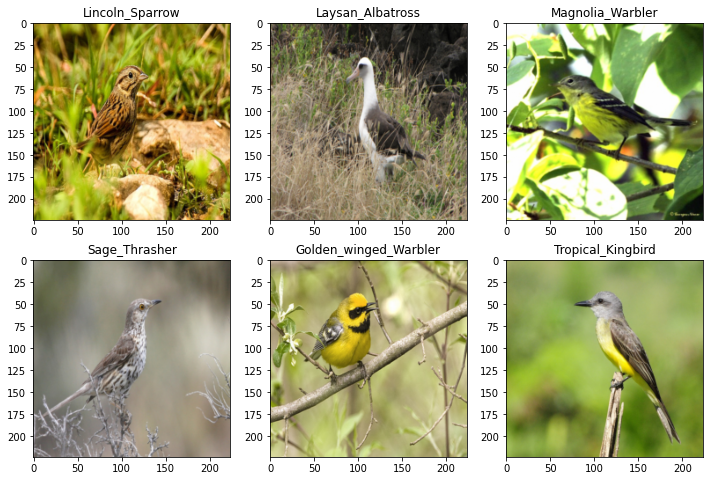

In [102]:
plt.figure(figsize=(12,8))
for i,(img,label) in enumerate(zip(img_batch[:6],label_batch[:6])):
    img = img.permute(1,2,0).numpy()
    plt.subplot(2,3,i+1)
    plt.title(index_to_label.get(label.item()))
    plt.imshow(img)

# 使用DenseNet提取特征

In [103]:
my_densenet = torchvision.models.densenet121(pretrained=True).features

In [104]:
my_densenet

Sequential(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [105]:
device = torch.device('cuda:0'if torch.cuda.is_available() else 'cpu')

In [106]:
my_densenet.to(device)

Sequential(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [167]:
for p in my_densenet.parameters():
    p.requires_grad = False

In [169]:
train_features = []
train_feat_labels = []
for im,la in train_dl:
    out = my_densenet(im.cuda())
    out = out.view(out.size(0),-1)
    train_features.extend(out.cpu().data) #将提取到的特征值张量给extend到train_features
    train_feat_labels.extend(la) #将对应的标签值给extend到train_feat_labels
test_features = []
test_feat_labels = []
for im,la in test_dl:
    out = my_densenet(im.cuda())
    out = out.view(out.size(0),-1)
    test_features.extend(out.cpu().data)
    test_feat_labels.extend(la)

In [170]:
len(train_features)

9430

In [171]:
len(train_feat_labels)

9430

In [ ]:
train_features[0].shape

In [172]:
class FeatureDataset(data.Dataset):
    def __init__(self,feat_list,label_list):
        self.feat_list = feat_list
        self.label_list = label_list
    def __getitem__(self,index):
        return self.feat_list[index],self.label_list[index]
    def __len__(self):
        return len(self.feat_list)

In [173]:
train_feat_ds = FeatureDataset(train_features,train_feat_labels)
test_feat_ds = FeatureDataset(test_features,test_feat_labels)

In [174]:
train_feat_dl = data.DataLoader(train_feat_ds,batch_size = batches,shuffle=True)
test_feat_dl = data.DataLoader(test_feat_ds,batch_size=batches)

In [176]:
in_feat_size = train_features[0].shape[0] #tuple子类
in_feat_size

50176

In [175]:
class FC_model(nn.Module):
    def __init__(self,in_size,out_size):
        super().__init__()
        self.linear = nn.Linear(in_size,out_size)
    def forward(self,input):
        return self.linear(input)

In [177]:
model = FC_model(in_feat_size,200)
model

FC_model(
  (linear): Linear(in_features=50176, out_features=200, bias=True)
)

In [178]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [179]:
model.to(device)

FC_model(
  (linear): Linear(in_features=50176, out_features=200, bias=True)
)

In [180]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.00001)

In [181]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    model.train()
    for x, y in trainloader:
        if torch.cuda.is_available():
            y = torch.tensor(y,dtype=torch.long)
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            opt.zero_grad()
            loss.backward()
            opt.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
#    exp_lr_scheduler.step()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    
    model.eval()
    with torch.no_grad():
        for x, y in testloader:
            if torch.cuda.is_available():
                y = torch.tensor(y,dtype=torch.long)
                x, y = x.to(device), y.to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                y_pred = torch.argmax(y_pred, dim=1)
                test_correct += (y_pred == y).sum().item()
                test_total += y.size(0)
                test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
    
        
    print('epoch: ', (epoch+1), 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [182]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

epochs = 30 
for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc=fit(epoch,model,train_feat_dl,test_feat_dl)
    
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

C:\Users\22789\AppData\Local\Temp\ipykernel_12568\2164248904.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=torch.long)
C:\Users\22789\AppData\Local\Temp\ipykernel_12568\2164248904.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype=torch.long)


epoch:  1 loss：  0.138 accuracy: 0.181 test_loss：  0.101 test_accuracy: 0.365
epoch:  2 loss：  0.061 accuracy: 0.708 test_loss：  0.074 test_accuracy: 0.514
epoch:  3 loss：  0.031 accuracy: 0.905 test_loss：  0.063 test_accuracy: 0.559
epoch:  4 loss：  0.017 accuracy: 0.971 test_loss：  0.059 test_accuracy: 0.589
epoch:  5 loss：  0.01 accuracy: 0.992 test_loss：  0.056 test_accuracy: 0.597
epoch:  6 loss：  0.006 accuracy: 0.999 test_loss：  0.054 test_accuracy: 0.609
epoch:  7 loss：  0.004 accuracy: 1.0 test_loss：  0.052 test_accuracy: 0.609
epoch:  8 loss：  0.003 accuracy: 1.0 test_loss：  0.051 test_accuracy: 0.614
epoch:  9 loss：  0.002 accuracy: 1.0 test_loss：  0.05 test_accuracy: 0.613
epoch:  10 loss：  0.002 accuracy: 1.0 test_loss：  0.049 test_accuracy: 0.616
epoch:  11 loss：  0.001 accuracy: 1.0 test_loss：  0.049 test_accuracy: 0.623
epoch:  12 loss：  0.001 accuracy: 1.0 test_loss：  0.048 test_accuracy: 0.624
epoch:  13 loss：  0.001 accuracy: 1.0 test_loss：  0.048 test_accuracy: 0.62

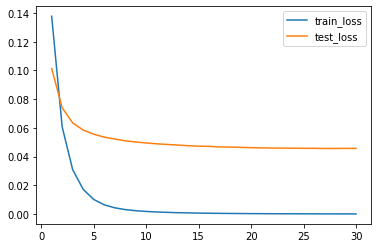

In [183]:
plt.plot(range(1,epochs+1),train_loss,label='train_loss')
plt.plot(range(1,epochs+1),test_loss,label='test_loss')
plt.legend()

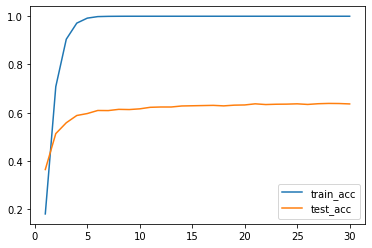

In [184]:
plt.plot(range(1,epochs+1),train_acc,label='train_acc')
plt.plot(range(1,epochs+1),test_acc,label='test_acc')
plt.legend()